In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler    
np.random.seed(20)

C:\Users\khale\AppData\Local\Temp\ipykernel_27124\1276569514.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_excel('../datasets/property_dataset.xlsx')
df.head()

,Unnamed: 0,inm_floor,inm_size,inm_price,inm_longitude,inm_latitude,inm_barrio,inm_distrito,his_price,his_quarterly_variation,...,dem_TasaDeParo,dem_TamanoMedioDelHogar,dem_PropSinEstudiosUniversitarios,dem_PropSinEstudios,dem_Proporcion_de_nacidos_fuera_de_Espana,dem_PropConEstudiosUniversitarios,dem_PobTotal,dem_NumViviendas,dem_EdadMedia,dem_Densidad_(Habit/Ha)
0,0,3.0,141.0,990000,-3.656875,40.464347,Canillas,Hortaleza,3250,2.2,...,8.724674,2.527886,0.488949,0.175632,15.456193,NaN,40838,16155,NaN,161.894356
1,1,2.0,159.0,940000,-3.703523,40.419427,Universidad,Centro,5106,1.4,...,9.006094,1.975877,0.386598,0.083812,32.102460,0.529590,33418,16913,43.678945,352.500616
2,2,NaN,NaN,549000,-3.669626,40.435362,Guindalera,Salamanca,4100,0.6,...,7.441379,2.369951,0.365818,0.070351,18.224365,0.563831,42306,17851,46.477166,263.952286
3,3,2.0,232.0,750000,-3.720619,40.424164,Argüelles,Moncloa - Aravaca,4773,0.5,...,6.709633,2.328217,0.343683,0.066403,20.963846,0.589914,24423,10490,46.972342,322.402577
4,4,4.0,183.0,1550000,-3.705909,40.413214,Sol,Centro,4739,-5.5,...,9.058980,1.994244,0.433750,0.082242,39.490947,0.484009,7622,3822,44.632774,171.165183


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17857 entries, 0 to 17856
Data columns (total 26 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Unnamed: 0                                       17857 non-null  int64  
 1   inm_floor                                        14067 non-null  float64
 2   inm_size                                         16090 non-null  float64
 3   inm_price                                        17857 non-null  int64  
 4   inm_longitude                                    17857 non-null  float64
 5   inm_latitude                                     17857 non-null  float64
 6   inm_barrio                                       16063 non-null  object 
 7   inm_distrito                                     16110 non-null  object 
 8   his_price                                        17857 non-null  int64  
 9   his_quarterly_variation     

In [4]:
df['inm_barrio'].value_counts()

inm_barrio
Goya             479
Embajadores      479
Universidad      472
Almagro          426
Justicia         412
                ... 
Canillejas        26
Pavones           21
Rosas             20
Hellín            19
Casa de Campo     14
Name: count, Length: 121, dtype: int64

In [5]:
df['inm_distrito'].value_counts()

inm_distrito
Salamanca                2064
Centro                   2045
Chamberí                 1275
Tetuán                   1038
Moncloa - Aravaca         990
Chamartín                 969
Carabanchel               911
Ciudad Lineal             875
Puente de Vallecas        864
Arganzuela                723
Hortaleza                 643
Fuencarral - El Pardo     534
Latina                    522
Usera                     507
Retiro                    475
Villaverde                406
San Blas - Canillejas     356
Villa de Vallecas         335
Barajas                   209
Vicálvaro                 200
Moratalaz                 169
Name: count, dtype: int64

In [6]:
df.describe()

,Unnamed: 0,inm_floor,inm_size,inm_price,inm_longitude,inm_latitude,his_price,his_quarterly_variation,his_annual_variation,his_monthly_variation,...,dem_TasaDeParo,dem_TamanoMedioDelHogar,dem_PropSinEstudiosUniversitarios,dem_PropSinEstudios,dem_Proporcion_de_nacidos_fuera_de_Espana,dem_PropConEstudiosUniversitarios,dem_PobTotal,dem_NumViviendas,dem_EdadMedia,dem_Densidad_(Habit/Ha)
count,17857.000000,14067.000000,16090.000000,1.785700e+04,17857.000000,17857.000000,17857.000000,17857.000000,17857.000000,17857.000000,...,17857.000000,17857.000000,17857.000000,17857.000000,17857.000000,16132.000000,17857.000000,17857.000000,16067.000000,17857.000000
mean,8928.000000,2.696453,149.013753,6.964702e+05,-3.688064,40.424817,3993.643389,0.437918,-1.814499,0.035549,...,8.736896,2.487494,0.436518,0.124281,24.851753,0.439830,28281.995296,11515.008960,44.315032,233.372820
std,5155.016214,2.387135,160.485808,8.547274e+05,0.039164,0.031176,1589.895597,2.510048,3.847875,1.533065,...,3.042722,0.300608,0.109068,0.076923,8.542049,0.181168,13117.299282,5322.072109,2.842113,122.653928
min,0.000000,-1.000000,8.000000,1.600000e+04,-3.837697,40.328140,1290.000000,-16.100000,-11.600000,-5.200000,...,3.643735,1.975877,0.246480,0.036422,8.884988,0.072421,2398.000000,872.000000,33.198916,2.267773
25%,4464.000000,1.000000,66.000000,1.899000e+05,-3.708170,40.402633,2578.000000,-1.100000,-4.300000,-0.600000,...,6.291480,2.297491,0.340818,0.062095,18.746056,0.257582,18785.000000,8011.000000,43.161070,155.641754
50%,8928.000000,2.000000,98.000000,3.700000e+05,-3.692498,40.426586,4049.000000,0.500000,-2.200000,0.000000,...,8.076921,2.466320,0.391468,0.085268,23.400147,0.512828,25023.000000,10637.000000,45.113343,228.165728
75%,13392.000000,4.000000,166.000000,8.490000e+05,-3.669516,40.446864,5106.000000,1.900000,-0.100000,0.900000,...,10.802359,2.673612,0.551965,0.191202,31.219133,0.592631,36922.000000,15312.000000,46.244228,322.402577
max,17856.000000,60.000000,2400.000000,1.500000e+07,-3.545674,40.507659,8299.000000,12.200000,17.200000,8.100000,...,18.030112,3.506552,0.641264,0.355659,53.296248,0.699977,67418.000000,26836.000000,49.332035,460.612389


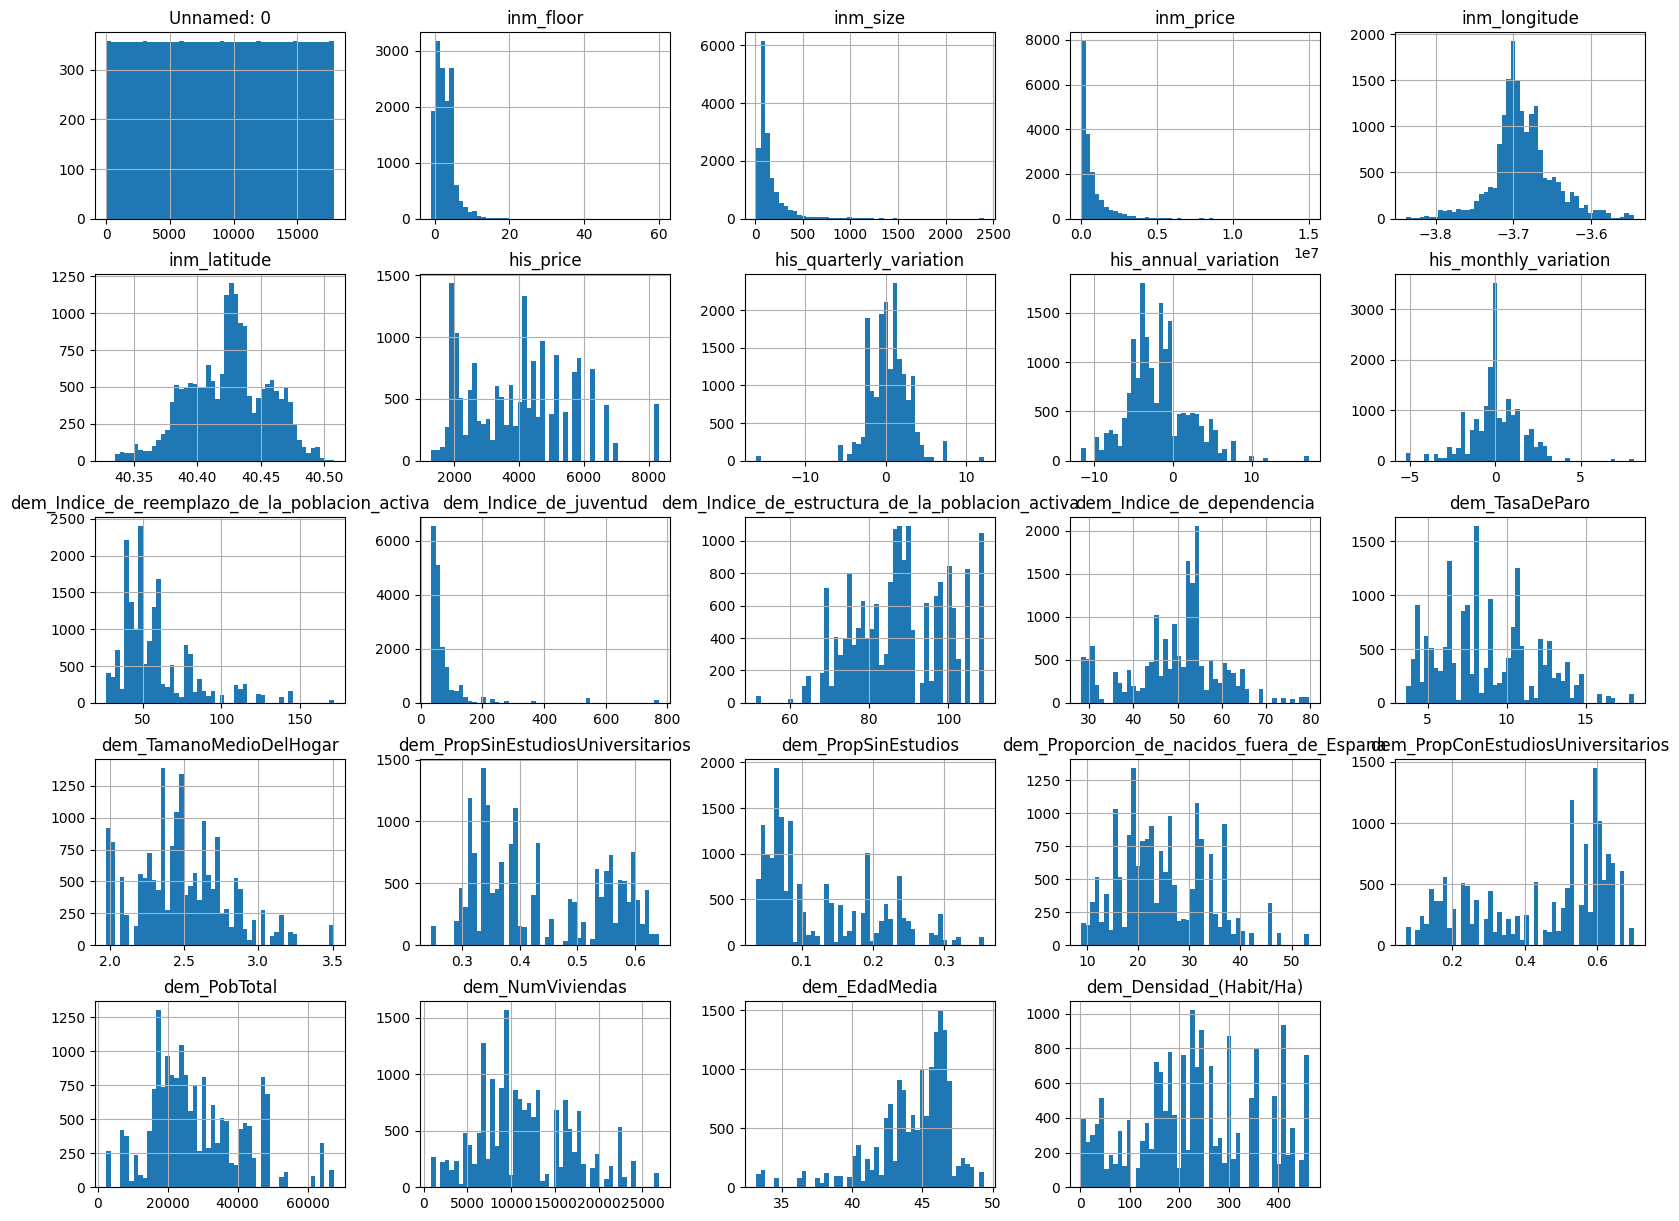

In [7]:

df.hist(bins=50, figsize=(20,15))
plt.show()


In [8]:
# Splitting the Data into Training and Test Sets
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [9]:
train_set, test_set = split_train_test(df, 0.2)
len(train_set), len(test_set)

(14286, 3571)

In [10]:
# copy the train set to avoid modifying the original dataset
train_set_copy = train_set.copy()

<Axes: xlabel='inm_longitude', ylabel='inm_latitude'>

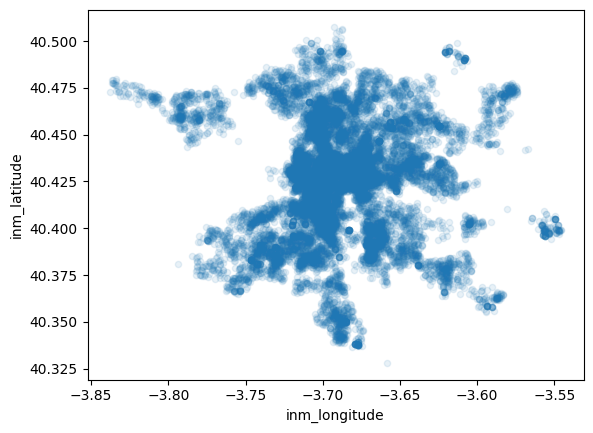

In [11]:
df.plot(kind="scatter", x="inm_longitude", y="inm_latitude", alpha=0.1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


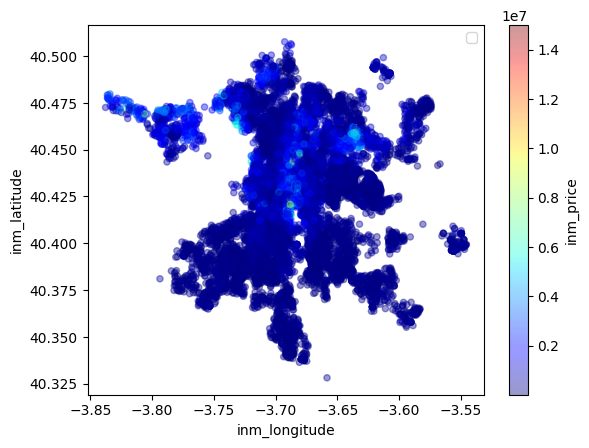

In [12]:
df.plot(kind="scatter", x="inm_longitude", y="inm_latitude", alpha=0.4,
    c="inm_price", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [13]:

numeric_columns = df.select_dtypes(include='number')
corr_matrix = numeric_columns.corr()
corr_matrix["inm_price"].sort_values(ascending=False)


inm_price                                          1.000000
inm_size                                           0.793583
his_price                                          0.545820
dem_PropConEstudiosUniversitarios                  0.534977
inm_latitude                                       0.305095
inm_floor                                          0.194307
dem_Indice_de_dependencia                          0.185440
his_annual_variation                               0.094119
his_quarterly_variation                            0.078519
dem_TamanoMedioDelHogar                            0.076173
dem_EdadMedia                                      0.072766
his_monthly_variation                              0.055043
Unnamed: 0                                         0.007614
dem_Indice_de_reemplazo_de_la_poblacion_activa    -0.017640
dem_Indice_de_estructura_de_la_poblacion_activa   -0.028431
dem_Indice_de_juventud                            -0.058233
inm_longitude                           

* inm_price: Strong positive correlation with inm_size (0.793583), his_price (0.545820), and dem_PropConEstudiosUniversitarios (0.534977).
* inm_size: Strong positive correlation with inm_price (0.793583).
* his_price: Moderate positive correlation with inm_price (0.545820).
* dem_PropConEstudiosUniversitarios: Moderate positive correlation with inm_price (0.534977).
* inm_latitude: Moderate positive correlation with inm_price (0.305095).
* inm_floor: Weak positive correlation with inm_price (0.194307).
* dem_Indice_de_dependencia: Weak positive correlation with inm_price (0.185440).
* his_annual_variation, his_quarterly_variation, dem_TamanoMedioDelHogar, * dem_EdadMedia, his_monthly_variation, Unnamed: 0: Weak positive correlations with inm_price.
* dem_Indice_de_reemplazo_de_la_poblacion_activa,dem_Indice_de_estructura_de_la_poblacion_activa, dem_Indice_de_juventud, inm_longitude, dem_Densidad_(Habit/Ha), dem_Proporcion_de_nacidos_fuera_de_Espana, dem_NumViviendas, dem_PobTotal: Weak negative correlations with inm_price.
* dem_PropSinEstudios: Moderate negative correlation with inm_price (-0.489288).
* dem_PropSinEstudiosUniversitarios: Moderate negative correlation with inm_price (-0.545868).
* dem_TasaDeParo: Strong negative correlation with inm_price (-0.561337).

array([[<Axes: xlabel='inm_price', ylabel='inm_price'>,
        <Axes: xlabel='inm_latitude', ylabel='inm_price'>,
        <Axes: xlabel='inm_size', ylabel='inm_price'>,
        <Axes: xlabel='inm_floor', ylabel='inm_price'>,
        <Axes: xlabel='his_price', ylabel='inm_price'>,
        <Axes: xlabel='dem_PropConEstudiosUniversitarios', ylabel='inm_price'>,
        <Axes: xlabel='dem_PropSinEstudios', ylabel='inm_price'>,
        <Axes: xlabel='dem_TasaDeParo', ylabel='inm_price'>,
        <Axes: xlabel='dem_PobTotal', ylabel='inm_price'>,
        <Axes: xlabel='dem_NumViviendas', ylabel='inm_price'>],
       [<Axes: xlabel='inm_price', ylabel='inm_latitude'>,
        <Axes: xlabel='inm_latitude', ylabel='inm_latitude'>,
        <Axes: xlabel='inm_size', ylabel='inm_latitude'>,
        <Axes: xlabel='inm_floor', ylabel='inm_latitude'>,
        <Axes: xlabel='his_price', ylabel='inm_latitude'>,
        <Axes: xlabel='dem_PropConEstudiosUniversitarios', ylabel='inm_latitude'>,
        

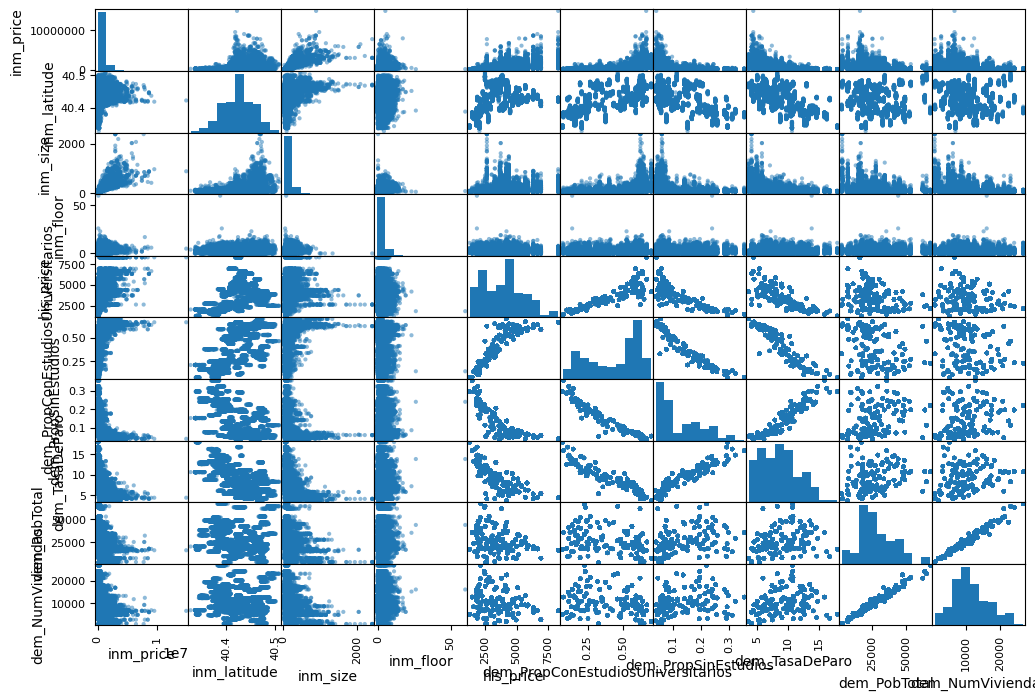

In [14]:

attributes = ["inm_price","inm_latitude","inm_size","inm_floor", "his_price", "dem_PropConEstudiosUniversitarios","dem_PropSinEstudios", "dem_TasaDeParo", "dem_PobTotal","dem_NumViviendas"]
scatter_matrix(df[attributes], figsize=(12, 8))


In [15]:
attributes = ["inm_price","inm_latitude","inm_size","inm_floor", "his_price", "dem_PropConEstudiosUniversitarios","dem_PropSinEstudios", "dem_TasaDeParo", "dem_PobTotal","dem_NumViviendas"]
train_set_copy.dropna(inplace=True)
X = train_set_copy[attributes]
Y = train_set_copy["inm_price"].copy()


In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()
# Fit and transform the data
scaled_data = scaler.fit_transform(X)
# Convert the scaled data back to a DataFrame
scaled_X = pd.DataFrame(scaled_data, columns=X.columns)
scaled_X

In [16]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
distrio_cat_1hot = cat_encoder.fit_transform(df[['inm_distrito']])
distrio_cat_1hot

<17857x22 sparse matrix of type '<class 'numpy.float64'>'
	with 17857 stored elements in Compressed Sparse Row format>

In [17]:
# X["distrio_cat_1hot"] = distrio_cat_1hot

In [18]:
# Initialize the StandardScaler
scaler = StandardScaler()
# Fit and transform the data
scaled_data = scaler.fit_transform(X)
# Convert the scaled data back to a DataFrame
scaled_X = pd.DataFrame(scaled_data, columns=X.columns)
scaled_X

,inm_price,inm_latitude,inm_size,inm_floor,his_price,dem_PropConEstudiosUniversitarios,dem_PropSinEstudios,dem_TasaDeParo,dem_PobTotal,dem_NumViviendas
0,-0.023233,-0.727829,-0.217426,-0.291429,-0.056638,0.397024,-0.291179,-0.292391,0.657119,0.737181
1,0.090799,0.840881,-0.033992,2.285395,1.398621,1.123051,-1.016115,-1.583255,-0.864951,-1.069779
2,-0.378747,0.217518,-0.523149,-0.720899,0.446133,0.844696,-0.705251,-0.556756,-0.404480,-0.207915
3,-0.084945,0.789783,-0.268380,-0.291429,0.138918,0.543796,-0.661962,-0.214950,0.658524,0.833263
4,1.170754,0.510750,1.413097,-0.291429,1.599730,1.114953,-1.020453,-1.499444,-0.875573,-0.913094
...,...,...,...,...,...,...,...,...,...,...
6740,0.224955,1.673473,1.127755,-0.291429,0.043916,1.016437,-0.905349,-0.952556,-0.489139,-0.711532
6741,-0.076896,-0.029243,0.271731,-0.720899,0.647241,0.518582,-0.542080,0.060214,0.383460,0.995702
6742,-0.003110,1.050185,0.913749,-1.150370,0.091417,0.494494,-0.522910,-0.545400,0.522007,0.672359
6743,0.379234,1.136027,0.067915,-0.720899,0.565811,0.860749,-0.776546,-0.449308,-1.717323,-1.741588


In [19]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(scaled_X, Y)

LinearRegression()

In [20]:
some_data = scaled_X.iloc[:5]
some_labels = Y.iloc[:5]
print("Predictions:", lin_reg.predict(some_data))
print("Labels:", list(some_labels))

Predictions: [ 610000.  695000.  345000.  564000. 1500000.]
Labels: [610000, 695000, 345000, 564000, 1500000]


In [21]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(scaled_X)
lin_mse = mean_squared_error(Y, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

7.038744939627556e-10

The Results from th linear regression Model is perfect, However the the model could be overfitting. Lets test it with the validation test . 

TypeError: Cannot convert [['Palomas' 'San Cristóbal' 'Moscardó' ... 'Buenavista' 'Gaztambide'
  'Vista Alegre']
 ['Hortaleza' 'Villaverde' 'Usera' ... 'Carabanchel' 'Chamberí'
  'Carabanchel']] to numeric

In [33]:
attributes = ["inm_price","inm_latitude","inm_size","inm_floor", "his_price", "dem_PropConEstudiosUniversitarios","dem_PropSinEstudios", "dem_TasaDeParo", "dem_PobTotal","dem_NumViviendas"]
test_set_copy = test_set.copy()
#test_set_copy.fillna(median, inplace=True)
X_validation = test_set_copy[attributes]
Y_validation = test_set_copy["inm_price"].copy()

In [34]:
median = test_set_copy.median()

TypeError: Cannot convert [['Palomas' 'San Cristóbal' 'Moscardó' ... 'Puerta del Ángel'
  'Embajadores' 'Vista Alegre']
 ['Hortaleza' 'Villaverde' 'Usera' ... 'Latina' nan 'Carabanchel']] to numeric

In [30]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(X_validation)

# Convert the scaled data back to a DataFrame
scaled_X_validation = pd.DataFrame(scaled_data, columns=X_validation.columns)

scaled_X_validation

,inm_price,inm_latitude,inm_size,inm_floor,his_price,dem_PropConEstudiosUniversitarios,dem_PropSinEstudios,dem_TasaDeParo,dem_PobTotal,dem_NumViviendas
0,0.199158,1.059278,0.922560,0.947376,-0.286920,1.055469,-1.136176,-0.884556,-1.717598,-1.844845
1,-0.671668,-2.631992,-0.627542,-0.306942,-1.759432,-2.110647,2.326966,3.165367,-0.914483,-1.265410
2,-0.498972,-1.140908,-0.587795,1.365482,-1.248040,-1.486181,1.224096,1.189214,-0.097715,-0.354536
3,0.542099,0.144306,0.684083,0.529270,0.985644,0.836666,-0.793308,-0.832309,0.127195,0.313010
4,0.431868,1.024864,2.313677,-1.143154,-0.268856,0.934125,-0.670150,-1.247603,-0.067775,-0.583081
...,...,...,...,...,...,...,...,...,...,...
1680,-0.636149,-0.425838,-1.015067,0.529270,0.067504,-0.060932,0.185603,0.655016,1.492707,2.112390
1681,-0.492848,-1.299094,-0.120778,0.947376,-1.315312,-1.483288,1.317221,1.110440,1.536939,1.126631
1682,-0.621451,-1.738955,-0.518240,-0.306942,-1.345210,-1.156260,0.610955,0.343884,1.569513,1.106986
1683,-0.132760,0.529809,-0.001539,-0.306942,0.414454,0.809097,-0.668808,-0.530197,-0.401029,-0.207489


In [31]:
housing_predictions = lin_reg.predict(scaled_X_validation)
lin_mse = mean_squared_error(Y_validation, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

71775.91161827621

In [22]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(scaled_X, Y)

DecisionTreeRegressor()

In [23]:
housing_predictions = tree_reg.predict(scaled_X)
tree_mse = mean_squared_error(Y, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0